In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [224]:
iris=load_iris()

In [225]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [226]:
df=pd.DataFrame(iris['data'], columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [227]:
df['Flower_Id']=iris['target']

In [228]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower_Id
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [229]:
df['Species']=df['Flower_Id'].apply(lambda X: iris['target_names'][X])

In [230]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower_Id,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


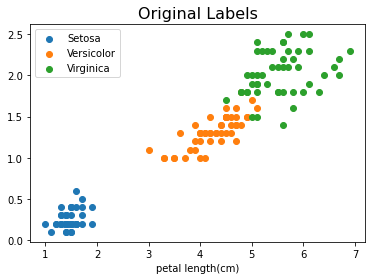

In [231]:
plt.title("Original Labels",fontsize=16)

plt.xlabel("petal length(cm)")
plt.scatter(df['petal length (cm)'][df.Species == "setosa"],df['petal width (cm)'][df.Species == "setosa"],label='Setosa')
plt.scatter(df['petal length (cm)'][df.Species == "versicolor"],df['petal width (cm)'][df.Species == "versicolor"],label='Versicolor')
plt.scatter(df['petal length (cm)'][df.Species == "virginica"],df['petal width (cm)'][df.Species == "virginica"],label='Virginica')
plt.legend()
plt.show()

In [232]:
df['Species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

In [233]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Flower_Id              int32
Species               object
dtype: object

F:\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
F:\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
F:\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


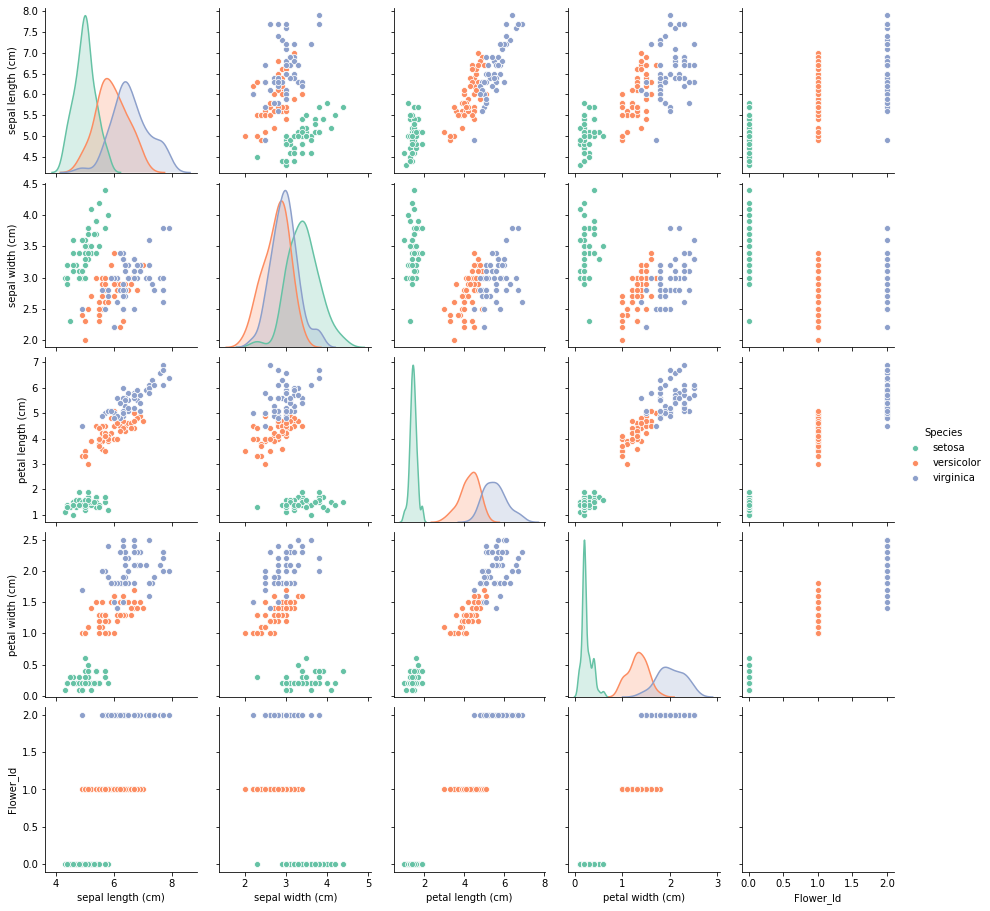

In [234]:
sns.pairplot(data=df,hue="Species",palette="Set2")
plt.show()

In [235]:
features=df.loc[:,['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

In [236]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [237]:
features.shape

(150, 4)

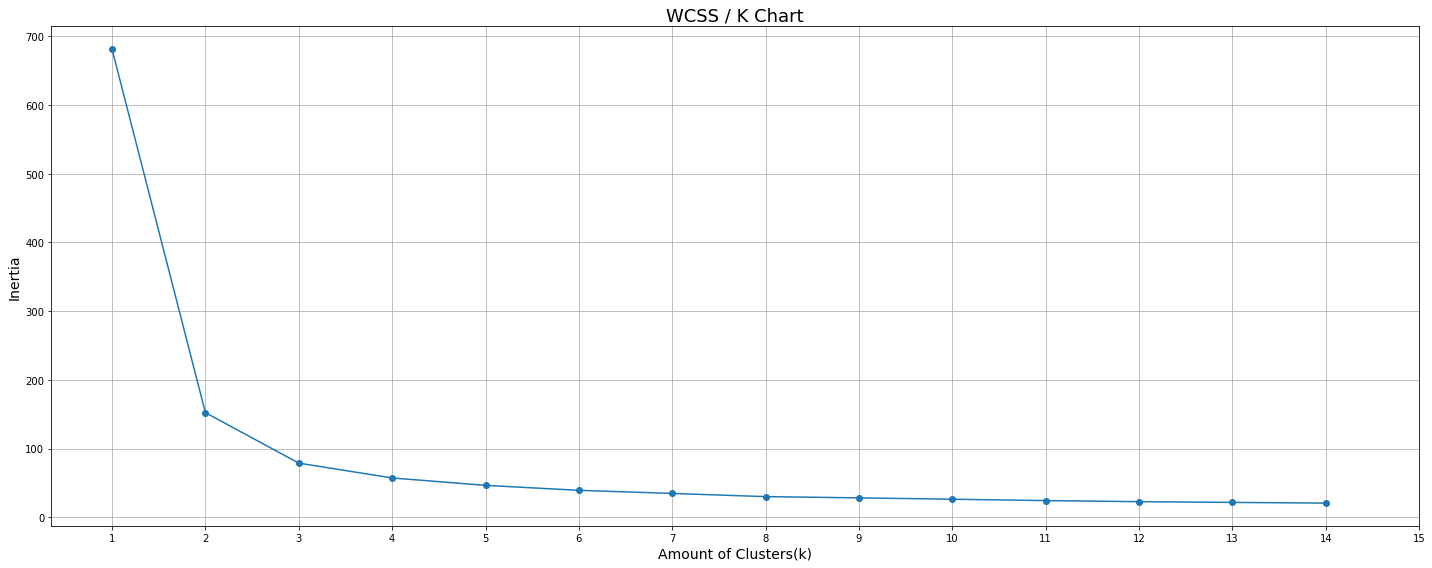

In [238]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters(k)",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,16))
plt.tight_layout()
plt.show()

In [239]:
features.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

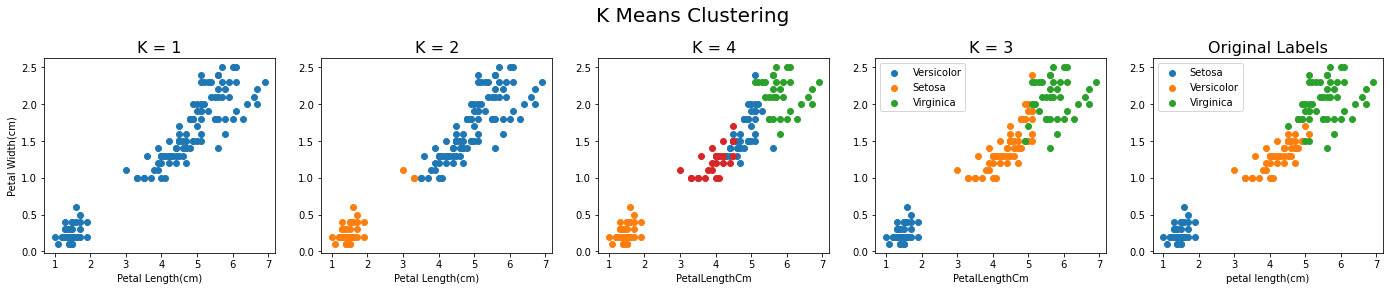

In [240]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.scatter(features['petal length (cm)'],features['petal width (cm)'])


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("Petal Length(cm)")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features['petal length (cm)'][features.labels == 0],features['petal width (cm)'][features.labels == 0])
plt.scatter(features['petal length (cm)'][features.labels == 1],features['petal width (cm)'][features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features['petal length (cm)'][features.labels == 0],features['petal width (cm)'][features.labels == 0],label='Versicolor')
plt.scatter(features['petal length (cm)'][features.labels == 1],features['petal width (cm)'][features.labels == 1],label='Setosa')
plt.scatter(features['petal length (cm)'][features.labels == 2],features['petal width (cm)'][features.labels == 2],label='Virginica')

plt.legend()
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features['petal length (cm)'][features.labels == 0],features['petal width (cm)'][features.labels == 0])
plt.scatter(features['petal length (cm)'][features.labels == 1],features['petal width (cm)'][features.labels == 1])
plt.scatter(features['petal length (cm)'][features.labels == 2],features['petal width (cm)'][features.labels == 2])
plt.scatter(features['petal length (cm)'][features.labels == 3],features['petal width (cm)'][features.labels == 3])
                     
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)

plt.xlabel("petal length(cm)")
plt.scatter(df['petal length (cm)'][df.Species == "setosa"],df['petal width (cm)'][df.Species == "setosa"],label='Setosa')
plt.scatter(df['petal length (cm)'][df.Species == "versicolor"],df['petal width (cm)'][df.Species == "versicolor"],label='Versicolor')
plt.scatter(df['petal length (cm)'][df.Species == "virginica"],df['petal width (cm)'][df.Species == "virginica"],label='Virginica')
plt.legend()

plt.subplots_adjust(top=0.8)
plt.show()

In [241]:
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [242]:
dd=pd.DataFrame(kmeans_predict,columns=['value'])
dd

,value
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,0
147,2
148,2


In [243]:
dd['value'].value_counts()

0    64
1    50
2    36
Name: value, dtype: int64

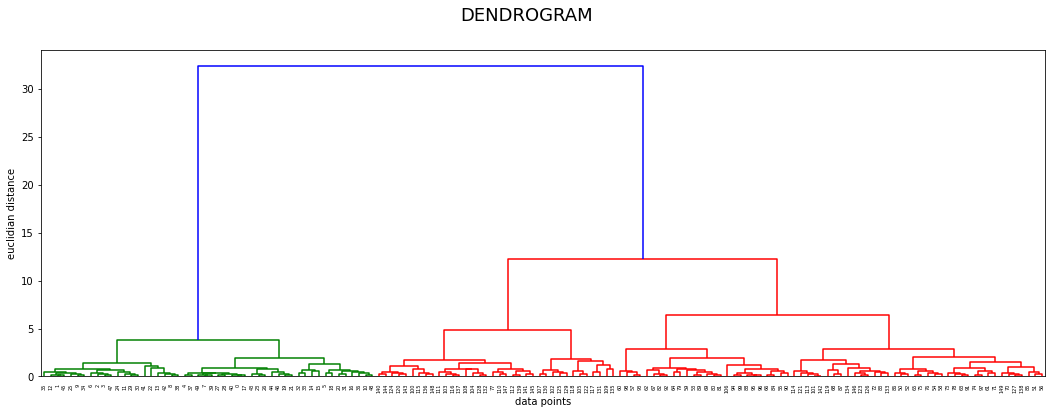

In [244]:
from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(features,method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")
plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

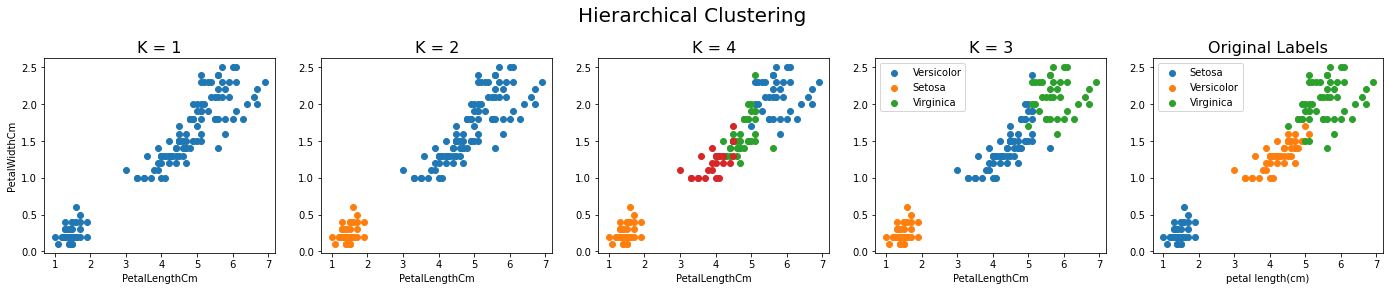

In [245]:
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features['petal length (cm)'],features['petal width (cm)'])


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=2)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features['petal length (cm)'][features.labels == 0],features['petal width (cm)'][features.labels == 0])
plt.scatter(features['petal length (cm)'][features.labels == 1],features['petal width (cm)'][features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=4)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features['petal length (cm)'][features.labels == 0],features['petal width (cm)'][features.labels == 0])
plt.scatter(features['petal length (cm)'][features.labels == 1],features['petal width (cm)'][features.labels == 1])
plt.scatter(features['petal length (cm)'][features.labels == 2],features['petal width (cm)'][features.labels == 2])
plt.scatter(features['petal length (cm)'][features.labels == 3],features['petal width (cm)'][features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=3)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features['petal length (cm)'][features.labels == 0],features['petal width (cm)'][features.labels == 0],label='Versicolor')
plt.scatter(features['petal length (cm)'][features.labels == 1],features['petal width (cm)'][features.labels == 1],label='Setosa')
plt.scatter(features['petal length (cm)'][features.labels == 2],features['petal width (cm)'][features.labels == 2],label='Virginica')
plt.legend()


# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)

plt.xlabel("petal length(cm)")
plt.scatter(df['petal length (cm)'][df.Species == "setosa"],df['petal width (cm)'][df.Species == "setosa"],label='Setosa')
plt.scatter(df['petal length (cm)'][df.Species == "versicolor"],df['petal width (cm)'][df.Species == "versicolor"],label='Versicolor')
plt.scatter(df['petal length (cm)'][df.Species == "virginica"],df['petal width (cm)'][df.Species == "virginica"],label='Virginica')
plt.legend()

plt.subplots_adjust(top=0.8)
plt.show()

<Figure size 864x432 with 0 Axes>

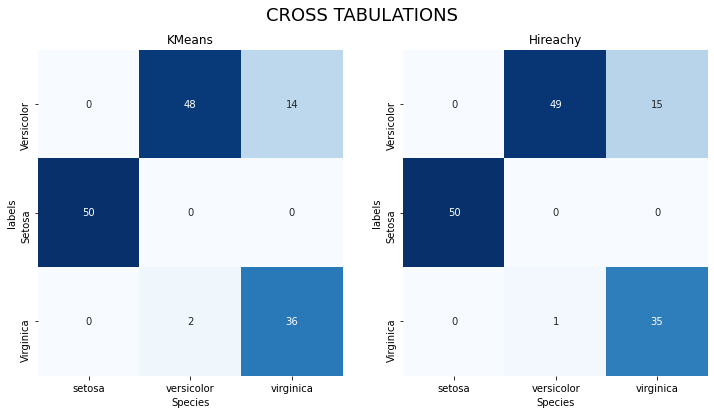

In [249]:
# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)
labels={'Versicolor':'0','Setosa':'1','Virginica':'2'}
# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":df['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])
plt.figure(figsize=(12,6))



# Hierachy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_cluster_predict= hc_cluster.fit_predict(features)
labels={'Versicolor':'0','Setosa':'1','Virginica':'2'}
# cross tabulation table for kmeans
df2 = pd.DataFrame({'labels':hc_cluster_predict,"Species":df['Species']})
ct2 = pd.crosstab(df2['labels'],df2['Species'])
plt.figure(figsize=(12,6))


plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues",yticklabels=labels)


plt.subplot(1,2,2)
plt.title("Hireachy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues",yticklabels=labels)
